## 모델에 대한 설명1 : PFI

- Permutation Feature Importance

### 1. 환경준비

In [ ]:
# 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import * 

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

In [ ]:
# data load
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


* 변수 설명
    * crim : 범죄율
    * zn : 대저택 비율
    * indus : 산업단지 비율
    * chas : 찰스 강변 여부
    * nox : 일산화질소 농도(공기오염도)
    * rm : 평균 주택당 방 수
    * age : 30년 이상된 주택 비율
    * dis : 주요 업무 지역 접근성 지수
    * rad : 고속도로 접근성 지수
    * tax  1만 달러당 재산세
    * ptratio : 교사 1명당 학생수
    * lstat : 하위계층 비율
    * black : 흑인비율(원래 숫자를 변형한 것임)
    * mdev : 타운별 집값 중위수(단위 : 1000달러)

In [ ]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

### 2. 데이터 준비

In [ ]:
# x, y split
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

In [ ]:
# dummy

In [ ]:
# train valid split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 2022)
x_train.shape

(404, 13)

In [ ]:
# Scaling
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

### 3. Permutation Feature Importance

- model1 : SVM
- model2 : DL

In [ ]:
from sklearn.inspection import permutation_importance

#### SVM

In [ ]:
# SVM
model1 = SVR()
model1.fit(x_train_s, y_train)

SVR()

In [ ]:
# PFI
pfi1 = permutation_importance(model1, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)

In [ ]:
pfi1

{'importances_mean': array([0.00945374, 0.02086725, 0.03294957, 0.03386631, 0.02895424,
        0.14430705, 0.05740539, 0.01810863, 0.02795648, 0.06606279,
        0.07908538, 0.01881995, 0.24118307]),
 'importances_std': array([0.00267741, 0.00728268, 0.00678155, 0.01320997, 0.00993524,
        0.01427471, 0.01680534, 0.01403577, 0.01069404, 0.01817568,
        0.01402084, 0.01418209, 0.02658648]),
 'importances': array([[0.01202894, 0.0107116 , 0.00956138, 0.01383913, 0.00721868,
         0.00671367, 0.0131682 , 0.00643447, 0.00687128, 0.00799003],
        [0.01532828, 0.02365336, 0.031247  , 0.01905323, 0.03024437,
         0.01534974, 0.02420276, 0.0057787 , 0.01862319, 0.02519188],
        [0.01920832, 0.03288757, 0.03588737, 0.03716216, 0.03562646,
         0.03493756, 0.03327672, 0.02338953, 0.0322704 , 0.04484963],
        [0.04604279, 0.02896597, 0.02650305, 0.06144869, 0.03828285,
         0.02357206, 0.03553383, 0.00886427, 0.03593179, 0.03351783],
        [0.02155195, 0.027

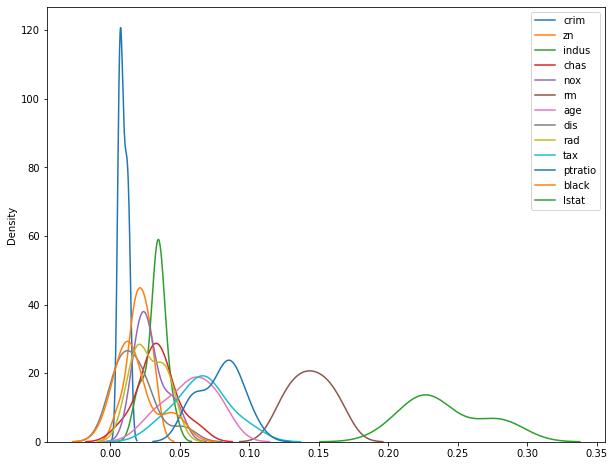

In [ ]:
# feature별 score 분포
plt.figure(figsize = (10,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi1.importances[i], label = vars)

plt.legend()
plt.show()

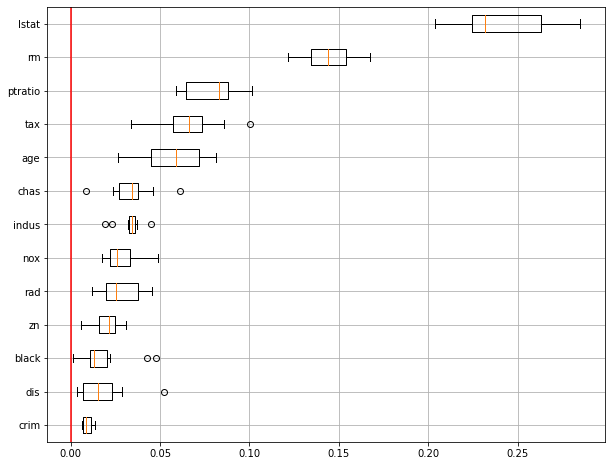

In [ ]:
sorted_idx = pfi1.importances_mean.argsort()
plt.figure(figsize = (10, 8))
plt.boxplot(pfi1.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

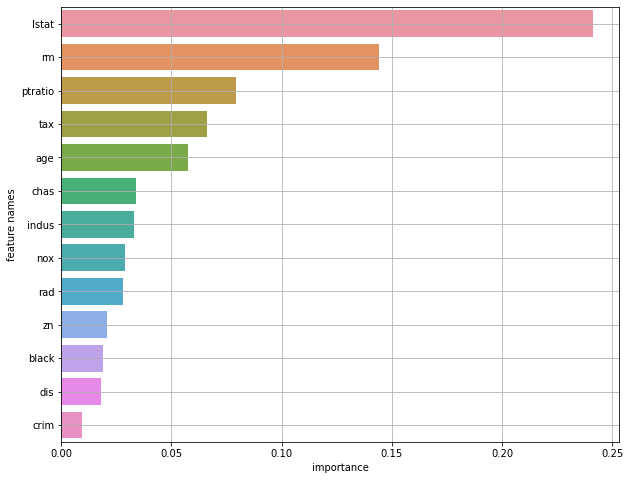

In [ ]:
# 평균값으로 변수중요도 그래프 그리기
result = plot_feature_importance(pfi1.importances_mean, list(x_train))

#### DL 모델

In [ ]:
x_train_s.shape[1]

13

In [ ]:
nfeatures = x_train_s.shape[1]
clear_session()

model2 = Sequential([Dense(32, input_shape = [nfeatures,], activation = 'relu'),
                     Dense(8, activation = 'relu'),
                     Dense(1)
                     ])

model2.compile(optimizer = 'adam', loss = 'mse')
history = model2.fit(x_train_s, y_train, epochs = 200, validation_split = .2).history

Epoch 1/200
11/11 [==============================] - 1s 21ms/step - loss: 621.6065 - val_loss: 589.3137
Epoch 2/200
11/11 [==============================] - 0s 6ms/step - loss: 616.2929 - val_loss: 584.6653
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 611.3578 - val_loss: 579.4745
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 605.7442 - val_loss: 573.2510
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 598.9103 - val_loss: 565.5496
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 590.3416 - val_loss: 555.7833
Epoch 7/200
11/11 [==============================] - 0s 7ms/step - loss: 579.4225 - val_loss: 543.6819
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 566.1720 - val_loss: 528.6750
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 550.0043 - val_loss: 511.0026
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss

# Permutation Feature Importance

- Deep Learning 모델에 대해서는 명시적으로 scoring='r2'을 지정.

In [ ]:
pfi2 = permutation_importance(model2, x_val_s, y_val, n_repeats=10, scoring = 'r2', random_state=2022)

In [ ]:
pfi2

{'importances_mean': array([ 0.026275  ,  0.02007165,  0.01095381,  0.00974492,  0.0055339 ,
         0.20518989, -0.00055364,  0.04270667,  0.0983201 ,  0.09846169,
         0.0513009 ,  0.07682345,  0.44808639]),
 'importances_std': array([0.00991124, 0.01023667, 0.00437359, 0.00820538, 0.00189676,
        0.03257128, 0.00624483, 0.02157112, 0.02998821, 0.02305387,
        0.01507872, 0.01952066, 0.06370473]),
 'importances': array([[ 0.02906825,  0.03107579,  0.03403021,  0.03419146,  0.0078976 ,
          0.02849888,  0.04178409,  0.0155766 ,  0.02578732,  0.01483983],
        [ 0.01304473,  0.02034659,  0.00552249,  0.035384  ,  0.02423081,
          0.02145454,  0.03437434,  0.00687053,  0.0109683 ,  0.02852013],
        [ 0.00918597,  0.00939142,  0.00925476,  0.00882392,  0.01029469,
          0.0185253 ,  0.01676245,  0.00253024,  0.0148075 ,  0.0099619 ],
        [ 0.01690562,  0.01198721, -0.00394284,  0.02306736,  0.01250519,
          0.01064202, -0.00071791,  0.00414531, 

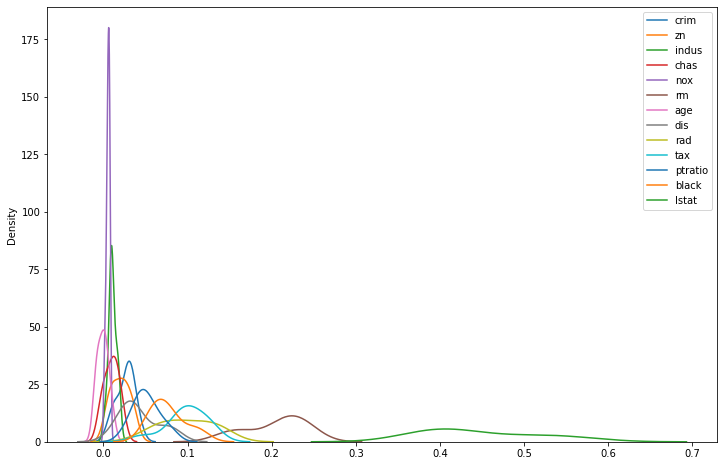

In [ ]:
# feature별 score 분포
plt.figure(figsize = (12,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi2.importances[i], label = vars)

plt.legend()
plt.show()

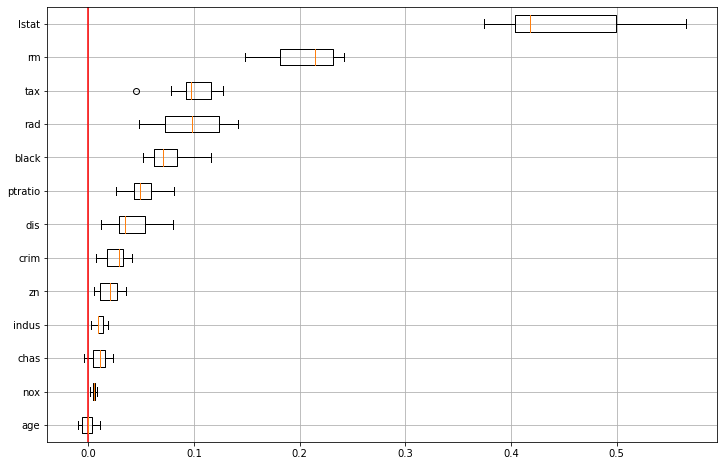

In [ ]:
sorted_idx = pfi2.importances_mean.argsort()
plt.figure(figsize = (12,8))
plt.boxplot(pfi2.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

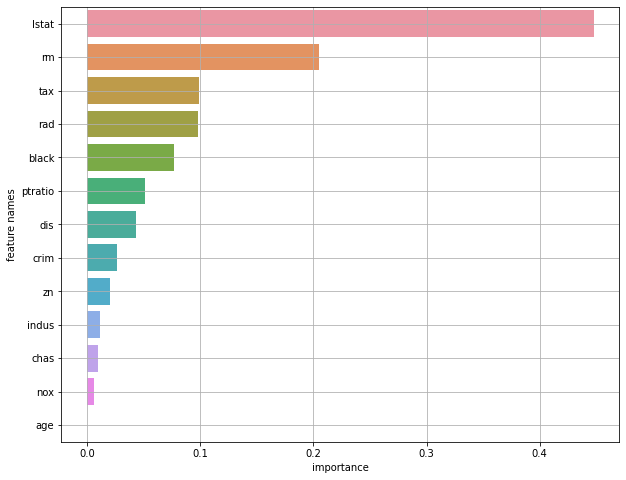

In [ ]:
# 평균값으로 변수중요도 그래프 그리기
result = plot_feature_importance(pfi2.importances_mean, list(x_train))

In [ ]:
from sklearn.metrics import *

In [ ]:
pred1 = model1.predict(x_val_s)
print(mean_absolute_error(y_val, pred1))

3.2468419828844173


In [ ]:
pred2 = model2.predict(x_val_s)
print(mean_absolute_error(y_val, pred2))

3.963907645730411


## 4. 실습 : 직원 이직 예측모델 변수 중요도 비교

### 1) 데이터 준비

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition2.csv"
data = pd.read_csv(path)
data.head(10)

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1
5,0,44,Research & Development,2,1,Medical,Male,Manufacturing Director,3,Single,10209,5,2,16,2,2,2
6,0,41,Sales,10,2,Life Sciences,Male,Sales Executive,4,Single,6230,7,4,16,3,3,14
7,0,25,Sales,18,1,Life Sciences,Male,Sales Executive,3,Married,6232,2,2,6,3,2,3
8,0,50,Research & Development,2,3,Medical,Male,Research Director,3,Married,17639,5,4,30,3,3,4
9,0,47,Sales,4,2,Life Sciences,Female,Sales Executive,4,Single,4163,1,3,9,0,3,9


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|

In [ ]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [ ]:
y.value_counts() / y.shape[0]

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

In [ ]:
# dummy variable
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance']
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True) 

* 데이터 분할
   * 이미 test set은 분할되어 있다고 가정.
   * 주어진 데이터를 train, valid로 분할.

In [ ]:
# train valid split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 2022)

In [ ]:
print(x_train.shape, x_val.shape)

(920, 38) (230, 38)


* class balance를 맞추기 위한 resampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
sm_x_train, sm_y_train = smote.fit_resample(x_train, y_train)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
sm_x_train_s = scaler.fit_transform(sm_x_train)
x_val_s = scaler.transform(x_val)

### 2) 모델링 및 변수 중요도 계산하기

  - model1: SVM
  - model2: KNN

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

#### (1) SVM

In [ ]:
# model
model1 = SVC()
model1.fit(sm_x_train_s, sm_y_train)

SVC()

In [ ]:
# permutation feature importance
pfi1 = permutation_importance(model1, x_val_s, y_val, n_repeats=10, 
                              random_state=2022)

In [ ]:
pfi1

{'importances_mean': array([ 0.        ,  0.        ,  0.0026087 ,  0.00173913,  0.00086957,
        -0.00043478,  0.00043478,  0.00347826,  0.00565217,  0.00043478,
        -0.00043478, -0.00086957,  0.00913043,  0.00521739,  0.00086957,
         0.01      ,  0.00695652,  0.00826087,  0.        ,  0.00869565,
        -0.0026087 ,  0.00130435, -0.00043478,  0.        ,  0.00478261,
         0.00782609,  0.00043478,  0.00217391, -0.00086957,  0.0026087 ,
         0.00043478,  0.00130435,  0.00086957, -0.00478261,  0.00086957,
         0.00391304,  0.0173913 ,  0.00782609]),
 'importances_std': array([0.00194441, 0.        , 0.00398485, 0.00443393, 0.00173913,
        0.00234138, 0.00130435, 0.0026087 , 0.00278397, 0.00493818,
        0.00130435, 0.00667926, 0.00493818, 0.00425998, 0.0026087 ,
        0.00391304, 0.00443393, 0.00304348, 0.        , 0.00336781,
        0.00347826, 0.00199242, 0.00493818, 0.00194441, 0.00657945,
        0.00468275, 0.00130435, 0.00350533, 0.00379035, 0.005

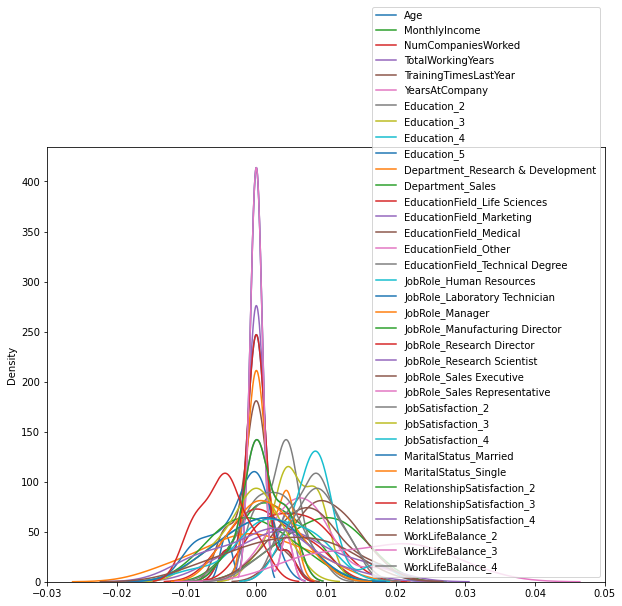

In [ ]:
# feature별 score 분포
plt.figure(figsize = (10,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi1.importances[i], label = vars)

plt.legend()
plt.show()

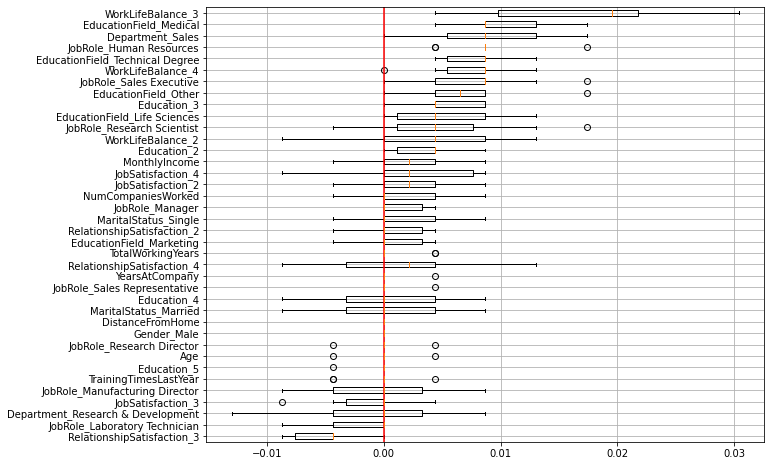

In [ ]:
sorted_idx = pfi1.importances_mean.argsort()
plt.figure(figsize = (10, 8))
plt.boxplot(pfi1.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

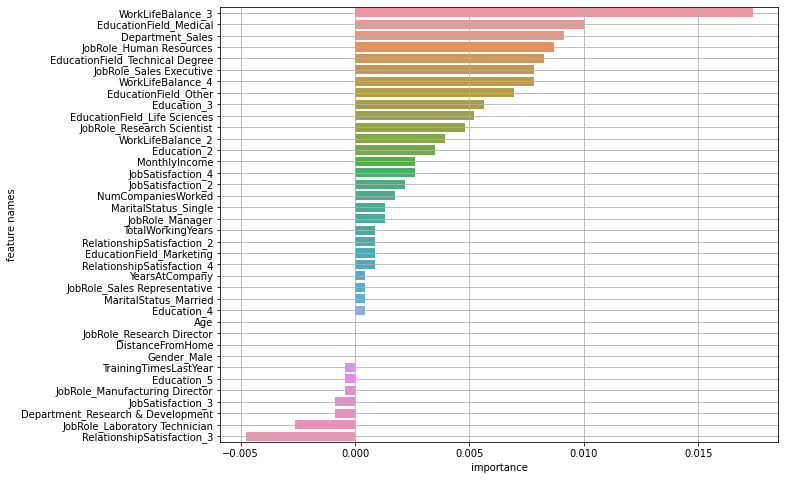

In [ ]:
# 평균값으로 변수중요도 그래프 그리기
result = plot_feature_importance(pfi1.importances_mean, list(x_train))

In [ ]:
# 예측 및 평가
pred1 = model1.predict(x_val_s)
print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))

[[214   3]
 [ 10   3]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       217
           1       0.50      0.23      0.32        13

    accuracy                           0.94       230
   macro avg       0.73      0.61      0.64       230
weighted avg       0.93      0.94      0.93       230



#### (2) KNN 모델

In [ ]:
# model
params = {'n_neighbors':range(3,50,2)}
model2 = GridSearchCV(KNeighborsClassifier(), params, cv = 5, verbose=3)
model2.fit(sm_x_train_s, sm_y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.826 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;, score=0.928 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.937 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.913 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.940 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.814 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5;, score=0.898 total time=   0.0s
[CV 3/5] END .....................n_neighbors=5;, score=0.916 total time=   0.1s
[CV 4/5] END .....................n_neighbors=5;, score=0.898 total time=   0.1s
[CV 5/5] END .....................n_neighbors=5;, score=0.913 total time=   0.0s
[CV 1/5] END .....................n_neighbors=7;, score=0.805 total time=   0.0s
[CV 2/5] END .....................n_neighbors=7

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 50, 2)}, verbose=3)

In [ ]:
# permutation feature importance 구하기
pfi2 = permutation_importance(model2, x_val_s, y_val, n_repeats=10, 
                              random_state=2022)

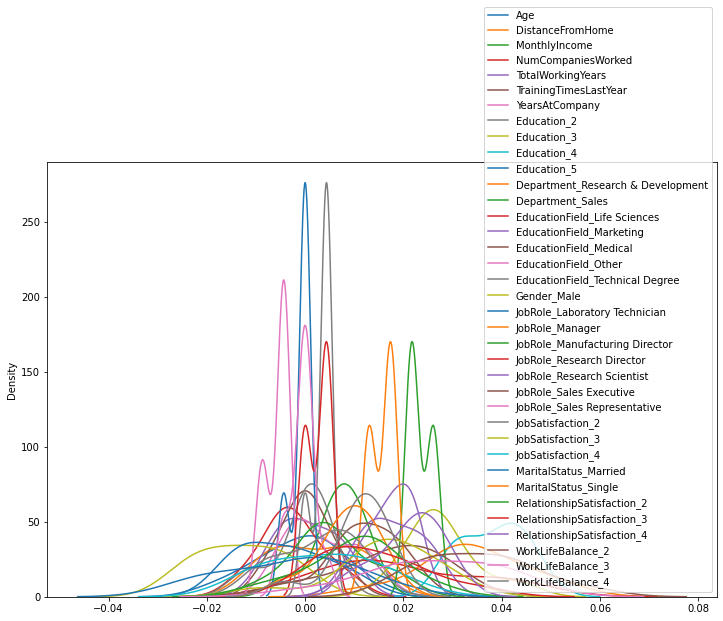

In [ ]:
# feature별 score 분포
plt.figure(figsize = (12,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi2.importances[i], label = vars)

plt.legend()
plt.show()

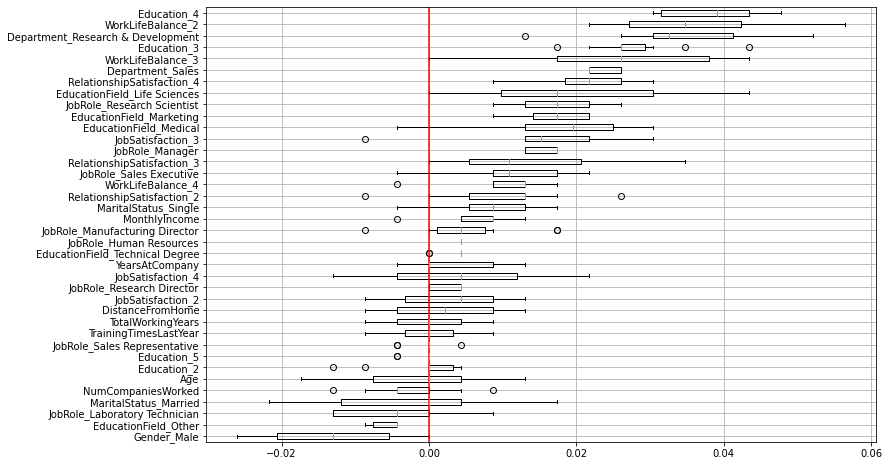

In [ ]:
sorted_idx = pfi2.importances_mean.argsort()
plt.figure(figsize = (12,8))
plt.boxplot(pfi2.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

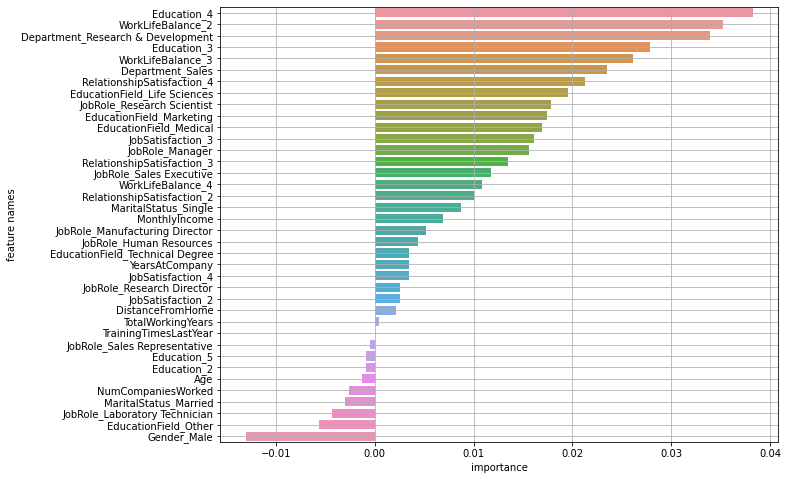

In [ ]:
# 평균값으로 변수중요도 그래프 그리기
result = plot_feature_importance(pfi2.importances_mean, list(x_train))

In [ ]:
pred2 = model2.predict(x_val_s)
print(confusion_matrix(y_val, pred2))
print(classification_report(y_val, pred2))

[[187  30]
 [  9   4]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       217
           1       0.12      0.31      0.17        13

    accuracy                           0.83       230
   macro avg       0.54      0.58      0.54       230
weighted avg       0.91      0.83      0.86       230

